<a href="https://colab.research.google.com/github/aysebren/car_park_detection/blob/master/loadAndDrawRectangles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
from google.colab import drive, files
import keras
import keras.utils
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.models import Model
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization,GlobalAveragePooling2D
from keras.optimizers import SGD
from keras.optimizers import Adadelta
from keras import backend as K

Using TensorFlow backend.


In [ ]:
import os
os.chdir("drive/My Drive")

FileNotFoundError: ignored

In [ ]:
import csv


file=open( "camera9.csv", "r")
reader = csv.reader(file)

xDim=[]
yDim=[]
wid=[]
heig=[]
for line in reader:
    slotId=line[0]
    xDim.extend([int(float(line[1])*(1000/2592))])
    yDim.extend([int(float(line[2])*(750/1944))])
    wid.extend([int(float(line[3])*(1000/2592))])
    heig.extend([int(float(line[4])*(750/1944))])



In [ ]:
from keras.models import load_model
initial_lrate=0.01
iteration=200
decay=0.01
lrate = initial_lrate * (1 / (1 + decay * iteration))

model=load_model('mymodelcnr.h5')
model.load_weights('mymodelcnr_weights.h5')
model.compile(loss='categorical_crossentropy',
            optimizer=SGD(lr=lrate),
            metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, None, None, 6 256         conv1[0][0]                      
____________________________________________________________________________________________

In [ ]:


# Open the file
with open( 'report.txt','w') as fh:
    # Pass the file handle in as a lambda function to make it callable
    model.summary(print_fn=lambda x: fh.write(x + '\n'))

In [ ]:
from PIL import Image
import numpy
im = Image.open("cam9 (6).jpg").convert('RGB')
np_im = numpy.array(im)
print (np_im.shape)
cols,rows,channel=np_im.shape
print(cols,rows)

(750, 1000, 3)
750 1000


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

for i in range(0,len(xDim)):

    im1 = im.crop((xDim[i], yDim[i], xDim[i]+heig[i], yDim[i]+wid[i]))
    im1.resize((224,224),Image.BICUBIC).save("resized "+str(i)+".jpg")

In [ ]:
save=[]
green=[]
for i in range(0,len(xDim)):
  im1 = Image.open("resized "+str(i)+".jpg").convert('RGB')
  im1 = np.expand_dims(im1, axis=0)
  im1 =im1/255
  label=model.predict_on_batch(im1)
  if label[0][0]>label[0][1]:
      save.extend([i])
  else:
      green.extend([i])

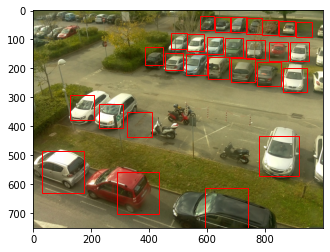

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.pyplot import figure
#fig(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(im)
for i in range(0,len(save)):
# Create a Rectangle patch
    rect = patches.Rectangle((xDim[save[i]],yDim[save[i]]),wid[save[i]],heig[save[i]],linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
for j in range(0,len(green)):
    rect1 = patches.Rectangle((xDim[green[j]],yDim[green[j]]),wid[green[j]],heig[green[j]],linewidth=1,edgecolor='g',facecolor='none')
# Add the patch to the Axes

    ax.add_patch(rect1)



plt.savefig("cam9(6)_boxed.jpg",dpi=1000)
plt.show()